# Imitation Learning

## Basic Idea:

Image Processing:
1. Convert to greyscale
2. Crop bottom part of the image
3. Convert to array
4. Compress data? Resize?

Data Processing:
1. Distribution of actions

Split Data: Train, Test, Validate:
1. Split the data? Shuffle?
2. X, Y

Modeling:
1. CNN
2. Multioutput
3. Multiclass for direction, binary for acceleration, binary for deceleration

Testing, Validation:
1. k-fold cross validation

Evaluation:
1. accuracy

Baseline model:
1. One or two layer model

Model in production:
1. Output format -> a = [0.0, 0.0, 0.0]

Data pipeline:

Conclusion & Discussion:

In [1]:
import random
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pickle
import seaborn as sns
import pydot

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Data Processing
### Read action data from saved csv

In [28]:
action_df = pd.read_csv('cnn_model_data/action.csv')
action_df = action_df[:-1]
action_df

,0,1,2
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [8]:
len(action_df)

3110

## Defining the Output for CNN 
### One hot encoding of the variables
Direction has 3 possible outcomes, while acceleration and deceleration have 2

In [9]:
print(action_df['0'].unique())
print(action_df['1'].unique())
print(action_df['2'].unique())

[ 0. -1.  1.]
[0. 1.]
[0.  0.8]


In [10]:
y1 = np.array(pd.get_dummies(action_df['0']))
y2 = np.array(pd.get_dummies(action_df['1']))
y3 = np.array(pd.get_dummies(action_df['2']))

In [11]:
y1 # 0, -1, 1 -> no action, left, right

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [12]:
y2 #no Accelerate, accelerate

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [13]:
y3 #no action, break

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

## Check the distribution of the labels

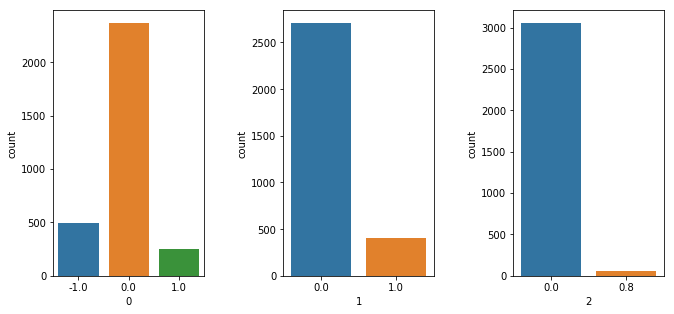

In [32]:
fig, ax =plt.subplots(1,3, figsize=(10,5))
sns.countplot(x=action_df['0'], ax=ax[0])
sns.countplot(x=action_df['1'], ax=ax[1])
sns.countplot(x=action_df['2'], ax=ax[2])
fig.tight_layout(pad=3.0)

### As expected the dataset is heavily imbalanced

One way to fix this is by using class weights in the model.fit

#### Class weights for heavily imbalanced data set

wj=n_samples / (n_classes * n_samplesj)

Here,

wj is the weight for each class(j signifies the class)
n_samples is the total number of samples or rows in the dataset
n_classes is the total number of unique classes in the target
n_samplesj is the total number of rows of the respective class

In [16]:
## Defining Class weights:
dir_cw_0 = len(y1) / (3*action_df[action_df['0']==-1].shape[0])
dir_cw_1 = len(y1) / (3*action_df[action_df['0']==0].shape[0])
dir_cw_2 = len(y1) / (3*action_df[action_df['0']==1].shape[0])

acc_cw_0 = len(y2) / (3*action_df[action_df['1']==0].shape[0])
acc_cw_1 = len(y2) / (3*action_df[action_df['1']==1].shape[0])

dec_cw_0 = len(y3) / (3*action_df[action_df['2']==0].shape[0])
dec_cw_1 = len(y3) / (3*action_df[action_df['2']==0.8].shape[0])

In [17]:
print(dir_cw_0, dir_cw_1, dir_cw_2,
      acc_cw_0,acc_cw_1,
      dec_cw_0,dec_cw_1)

2.1156462585034013 0.43778153153153154 4.113756613756614 0.38267503383782453 2.5852036575228596 0.3392233856893543 19.19753086419753


### Check to see if two keys can be pressed at once. (if true, possible to simplify the model further)

In [38]:
result = pd.Series(index=action_df.index, data=np.count_nonzero(action_df, axis=1))
result

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [39]:
result[result>1] ## this means that more than one value is possible in one action

1575    2
1576    2
dtype: int64

## Preprocessing the images


1. One hot encoding
2. Convert to Greyscale
3. Crop lower progress bar
4. Rescale image
5. Convert image to array
6. Append image array to training_data
7. Append output labels to training_data
8. Shuffle data
9. Normalize data
10. Save data in pickle format

In [41]:
ls

DataProcessing.ipynb
Imitation Learning - CNN.ipynb
Imitation Learning - multi modal CNN.ipynb
Imitation Learning - multi output - CNN - baseline model.ipynb
Imitation Learning - multi output - CNN - keras trial.ipynb
Imitation Learning - multi output - CNN.ipynb
README.md
X.pickle
X_CNN_1.pickle
acceleration_model_cnn.png
action.csv
checkpoint
cnn_model_data/
data/
deceleration_model_cnn.png
direction_model_cnn.png
environment.yaml
gym/
just_for_gags/
logs/
model_checkpoint.data-00000-of-00001
model_checkpoint.index
models/
multi_output_baseline_model.png
multi_output_model.png
multi_output_model_cnn.png
multiple_model_cnn.png
pics/
play.py
requirements.txt
testing/
y.pickle
y_CNN_1.pickle


In [13]:
y1_df = pd.DataFrame(y1)
y1_df.columns=['left', 'no dir', 'right'] # -1 0 1
y1_df

,left,no dir,right
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [14]:
y2_df = pd.get_dummies(action_df['1'])
y2_df.columns = ['no acc', 'acc']
y2_df

,no acc,acc
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [15]:
y3_df = pd.get_dummies(action_df['2'])
y3_df.columns = ['no decc', 'decc']
y3_df

,no decc,decc
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [16]:
y_df = pd.concat([y1_df, y2_df, y3_df], axis = 1)
y_df

,left,no dir,right,no acc,acc,no decc,decc
0,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0
4,0,1,0,1,0,1,0
5,0,1,0,1,0,1,0
6,0,1,0,1,0,1,0
7,0,1,0,1,0,1,0
8,0,1,0,1,0,1,0
9,0,1,0,1,0,1,0


In [17]:
y_df.shape

(3110, 7)

In [18]:
DATADIR = os.getcwd()
PICSPATH = "cnn_model_data/pics/"

In [19]:
h = 350
w = 600
rh = int(h/2)
rw = int(w/2)
training_data = []
error_files = []
exp = []

def create_training_data():
    
    path = os.path.join(DATADIR, 'cnn_model_data/pics')
    
    for img in tqdm(os.listdir(path)):
        val = img.split('_')[0]
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            crp_array = img_array[0:h, 0:w]
            new_array = cv2.resize(crp_array, ((rw,rh)))
            df_val = y_df.iloc[int(val)]
            training_data.append([new_array, 
                                  df_val[0], df_val[1], df_val[2], 
                                  df_val[3], df_val[4], df_val[5], df_val[6]])
        except Exception as e:
            error_files.append(img)
            exp.append(e)
            pass

create_training_data()
print(len(training_data))

100%|██████████| 3112/3112 [00:08<00:00, 352.88it/s]

3110


In [49]:
exp

[TypeError("'NoneType' object is not subscriptable"),
 IndexError('single positional indexer is out-of-bounds')]

In [50]:
print(error_files)

['.DS_Store', '3110_pics.png']


In [51]:
training_data

[[array([[161, 161, 161, ...,   0,   0,   0],
         [161, 161, 161, ...,   0,   0,   0],
         [161, 161, 161, ...,   0,   0,   0],
         ...,
         [176, 176, 176, ..., 161, 161, 161],
         [176, 176, 176, ..., 161, 161, 161],
         [176, 176, 176, ..., 161, 161, 161]], dtype=uint8),
  0,
  1,
  0,
  1,
  0,
  1,
  0],
 [array([[105, 105, 105, ..., 161, 161, 161],
         [105, 105, 105, ..., 161, 161, 161],
         [105, 105, 105, ..., 161, 161, 161],
         ...,
         [161, 161, 161, ..., 161, 161, 161],
         [161, 161, 161, ..., 161, 161, 161],
         [161, 161, 161, ..., 161, 161, 161]], dtype=uint8),
  0,
  1,
  0,
  0,
  1,
  1,
  0],
 [array([[105, 105, 105, ..., 161, 161, 161],
         [105, 105, 105, ..., 161, 161, 161],
         [105, 105, 105, ..., 161, 161, 161],
         ...,
         [161, 161, 161, ..., 161, 161, 161],
         [161, 161, 161, ..., 161, 161, 161],
         [161, 161, 161, ..., 161, 161, 161]], dtype=uint8),
  0,
  1,
  0

In [52]:
len(training_data)

3110

In [20]:
random.shuffle(training_data)

X = []
y = []

for features, l, ndi, r, na, ac, ndc, dc in training_data:
    X.append(features)
    y.append([l, ndi, r, na, ac, ndc, dc])
    
#print(X[0].reshape(-1, rw, rh, 1))

#X = np.array(X).reshape(-1, rw, rh, 1)
X = np.array(X)
y = np.array(y)

X = X/255.0

In [77]:
X[0]

array([[[0.63137255],
        [0.63137255],
        [0.63137255],
        ...,
        [0.41176471],
        [0.41176471],
        [0.41176471]],

       [[0.41176471],
        [0.41176471],
        [0.41568627],
        ...,
        [0.69019608],
        [0.69019608],
        [0.69019608]],

       [[0.69019608],
        [0.69019608],
        [0.69019608],
        ...,
        [0.69019608],
        [0.69019608],
        [0.69019608]],

       ...,

       [[0.69019608],
        [0.69019608],
        [0.69019608],
        ...,
        [0.63137255],
        [0.63137255],
        [0.63137255]],

       [[0.63137255],
        [0.63137255],
        [0.63137255],
        ...,
        [0.4       ],
        [0.4       ],
        [0.4       ]],

       [[0.4       ],
        [0.4       ],
        [0.4       ],
        ...,
        [0.63137255],
        [0.63137255],
        [0.63137255]]])

In [6]:
y[0]

array([1, 0, 0, 1, 0, 1, 0], dtype=uint8)

In [64]:
type(X)

numpy.ndarray

In [65]:
type(y)

numpy.ndarray

In [54]:
X.shape

(3110, 175, 300)

In [55]:
y.shape

(3110, 7)

In [56]:
"""pickle_out = open("cnn_model_data/X_CNN_multioutput_il.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("cnn_model_data/y_CNN_multioutput_il.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()"""

In [3]:
"""## to load pickle files:

pickle_in = open("cnn_model_data/X_CNN_multioutput_il.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("cnn_model_data/y_CNN_multioutput_il.pickle","rb")
y = pickle.load(pickle_in)"""

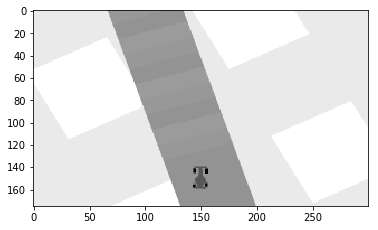

In [40]:
h = 350
w = 600
rh = int(h/2)
rw = int(w/2)

filepath = 'pics/230_pics.png'

img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
crp_array = img_array[0:h, 0:w]
new_array = cv2.resize(crp_array, (rw, rh))
plt.imshow(new_array, cmap='gray')
plt.show()

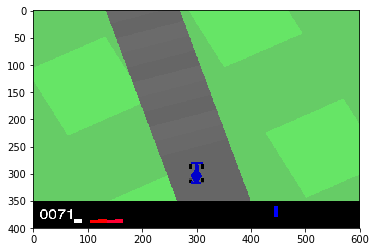

In [39]:
filepath = 'pics/230_pics.png'

img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)

plt.imshow(img_array)
plt.show()